# Data Understanding

In [1]:
# open the pickle file in the dataset folder
# and print the first 10 entries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


df = pd.read_pickle('dataset/smart_app_data.pkl')

In [2]:
df.head(15)

,time,asset_id,name,kpi,sum,avg,min,max
0,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,working_time,0.000000,0.000000,0.000000,0.000000
1,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,idle_time,0.000000,0.000000,0.000000,0.000000
2,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,offline_time,0.000000,0.000000,0.000000,0.000000
3,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.066106,0.002321,0.000000,0.066106
4,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,power,NaN,0.003673,0.000000,0.012801
5,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption_working,0.062370,0.006678,0.000005,0.015817
6,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption_idle,0.003736,0.000195,0.000000,0.001473
11,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,cost,0.000000,0.000645,0.000000,0.000000
12,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,cost_working,0.000000,0.000000,0.000000,0.000000
13,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,cost_idle,0.000000,0.000000,0.000000,0.000000


In [3]:
# check which columns are na
df.isna().sum()


time           0
asset_id       0
name           0
kpi            0
sum         7456
avg            0
min            0
max            0
dtype: int64

In [4]:
# see all entries of `name` column
df['name'].unique()

array(['Large Capacity Cutting Machine 1', 'Riveting Machine',
       'Medium Capacity Cutting Machine 1', 'Laser Cutter',
       'Large Capacity Cutting Machine 2',
       'Medium Capacity Cutting Machine 2', 'Testing Machine 1',
       'Testing Machine 2', 'Low Capacity Cutting Machine 1',
       'Medium Capacity Cutting Machine 3', 'Assembly Machine 1',
       'Laser Welding Machine 1', 'Assembly Machine 2',
       'Assembly Machine 3', 'Laser Welding Machine 2',
       'Testing Machine 3'], dtype=object)

## Dealing with NaN
We substitute the `sum` value with `max` when `sum` is NaN, this is justified by the fact that `max` is a lower bound of `sum`.

In [5]:
# when sum is na, change it with the value of the column 'max' 
df['sum'] = df['sum'].fillna(df['max'])

In [6]:
df.isna().sum()

time        0
asset_id    0
name        0
kpi         0
sum         0
avg         0
min         0
max         0
dtype: int64

In [7]:
# How many time series are in the dataset? 
# n. machines * n. KPIs per machine * 4 (sum, avg, min, max)
n = 16 * 14 * 4
print('There are', n, 'time series in the dataset')

There are 896 time series in the dataset


In [8]:
df.columns

Index(['time', 'asset_id', 'name', 'kpi', 'sum', 'avg', 'min', 'max'], dtype='object')

In [9]:
# take only the first 10 chars of time column
#df['time'] = df['time'].str[:10]

# Convert the "time" column to just the date (YYYY-MM-DD) format
df['time'] = pd.to_datetime(df['time']).dt.date

df.head()

,time,asset_id,name,kpi,sum,avg,min,max
0,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,working_time,0.000000,0.000000,0.0,0.000000
1,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,idle_time,0.000000,0.000000,0.0,0.000000
2,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,offline_time,0.000000,0.000000,0.0,0.000000
3,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.066106,0.002321,0.0,0.066106
4,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,power,0.012801,0.003673,0.0,0.012801


# Convert to a JSON file

In [10]:
"""# Initialize an empty dictionary for the final structure
machines_data = {"machines": []}

# Group by name (machine), time, then prepare KPIs for each date per machine
for name, machine_data in df.groupby('name'):
    # Initialize machine entry
    machine_entry = {
        "machine_id": name,
        "data": []
    }
    
    for date, date_data in machine_data.groupby('time'):
        # Initialize date entry
        date_entry = {
            "date": str(date),
            "KPIs": {}
        }
        
        # Iterate over each KPI for this date
        for _, row in date_data.iterrows():
            kpi_name = row['kpi']
            date_entry["KPIs"][kpi_name] = {
                "sum": row['sum'] if pd.notnull(row['sum']) else None,
                "average": row['avg'] if pd.notnull(row['avg']) else None,
                "min": row['min'] if pd.notnull(row['min']) else None,
                "max": row['max'] if pd.notnull(row['max']) else None
            }
        
        # Append the date entry to the machine's data list
        machine_entry["data"].append(date_entry)
    
    # Append the machine entry to the machines_data list
    machines_data["machines"].append(machine_entry)"""

'# Initialize an empty dictionary for the final structure\nmachines_data = {"machines": []}\n\n# Group by name (machine), time, then prepare KPIs for each date per machine\nfor name, machine_data in df.groupby(\'name\'):\n    # Initialize machine entry\n    machine_entry = {\n        "machine_id": name,\n        "data": []\n    }\n    \n    for date, date_data in machine_data.groupby(\'time\'):\n        # Initialize date entry\n        date_entry = {\n            "date": str(date),\n            "KPIs": {}\n        }\n        \n        # Iterate over each KPI for this date\n        for _, row in date_data.iterrows():\n            kpi_name = row[\'kpi\']\n            date_entry["KPIs"][kpi_name] = {\n                "sum": row[\'sum\'] if pd.notnull(row[\'sum\']) else None,\n                "average": row[\'avg\'] if pd.notnull(row[\'avg\']) else None,\n                "min": row[\'min\'] if pd.notnull(row[\'min\']) else None,\n                "max": row[\'max\'] if pd.notnull(row[\'max\

In [11]:
"""# Convert to JSON format
json_output = json.dumps(machines_data, indent=4)

# save the json output to a file
with open('dataset/smart_app_data.json', 'w') as f:
    f.write(json_output)"""

"# Convert to JSON format\njson_output = json.dumps(machines_data, indent=4)\n\n# save the json output to a file\nwith open('dataset/smart_app_data.json', 'w') as f:\n    f.write(json_output)"

# Monthly JSON

In [12]:
# Assuming `df` is the DataFrame we previously worked with
# Convert the "time" column to a datetime format and extract the month in YYYY-MM format
df['month'] = pd.to_datetime(df['time']).dt.to_period('M').astype(str)

df.head()

,time,asset_id,name,kpi,sum,avg,min,max,month
0,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,working_time,0.000000,0.000000,0.0,0.000000,2024-03
1,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,idle_time,0.000000,0.000000,0.0,0.000000,2024-03
2,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,offline_time,0.000000,0.000000,0.0,0.000000,2024-03
3,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.066106,0.002321,0.0,0.066106,2024-03
4,2024-03-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,power,0.012801,0.003673,0.0,0.012801,2024-03


In [13]:
# Group by 'asset_id', 'month', and 'kpi' to calculate monthly aggregates
monthly_summary_df = df.groupby(['name', 'month', 'kpi']).agg(
    average=('avg', 'mean'),
    min=('min', 'min'),
    max=('max', 'max')
).reset_index()

monthly_summary_df.head()

,name,month,kpi,average,min,max
0,Assembly Machine 1,2024-03,average_cycle_time,0.0,0.0,0.0
1,Assembly Machine 1,2024-03,bad_cycles,0.0,0.0,0.0
2,Assembly Machine 1,2024-03,consumption,0.0,0.0,0.0
3,Assembly Machine 1,2024-03,consumption_idle,0.0,0.0,0.0
4,Assembly Machine 1,2024-03,consumption_working,0.0,0.0,0.0


In [14]:
# to check if the data is correct we can visualize the avg consumption for machine Large Capacity Cutting Machine 1 in the month of 2024-05 
# and then calculate manually the avg consumption over this month and compare it with the value in the dataframe

# the value should be: 0.002799 as can be seen below
monthly_summary_df[(monthly_summary_df['name'] == 'Large Capacity Cutting Machine 1') & (monthly_summary_df['month'] == '2024-05') & (monthly_summary_df['kpi'] == 'consumption')]

,name,month,kpi,average,min,max
366,Large Capacity Cutting Machine 1,2024-05,consumption,0.002799,0.0,0.124127


In [43]:
# let's visualize the avg consumption for machine Large Capacity Cutting Machine 1 in the month of 2024-05 using df
df[(df['name'] == 'Large Capacity Cutting Machine 1') & (df['month'] == '2024-05') & (df['kpi'] == 'consumption')]

,time,asset_id,name,kpi,sum,avg,min,max,month
1589,2024-05-01,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.000000,0.000000,0.000000,0.000000,2024-05
1615,2024-05-02,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.091875,0.005182,0.000000,0.091875,2024-05
1641,2024-05-03,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.013116,0.001144,0.000059,0.013116,2024-05
1667,2024-05-04,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.035970,0.002309,0.000000,0.035970,2024-05
1693,2024-05-05,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.000000,0.000000,0.000000,0.000000,2024-05
1719,2024-05-06,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.021516,0.001399,0.000000,0.021516,2024-05
1745,2024-05-07,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.091332,0.000930,0.000000,0.091332,2024-05
1771,2024-05-08,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.072417,0.000347,0.000001,0.072417,2024-05
1797,2024-05-09,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.064166,0.009945,0.000000,0.064166,2024-05
1823,2024-05-10,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.070085,0.003098,0.000000,0.070085,2024-05


In [44]:
# calculate the mean of the avg column of the above dataframe
df[(df['name'] == 'Large Capacity Cutting Machine 1') & (df['month'] == '2024-05') & (df['kpi'] == 'consumption')]['avg'].mean()

0.0027993799499024708

ok!😊👍 Now let's search for the answers to the queries in `queries.txt`

In [15]:
# see available machines
df['name'].unique()

array(['Large Capacity Cutting Machine 1', 'Riveting Machine',
       'Medium Capacity Cutting Machine 1', 'Laser Cutter',
       'Large Capacity Cutting Machine 2',
       'Medium Capacity Cutting Machine 2', 'Testing Machine 1',
       'Testing Machine 2', 'Low Capacity Cutting Machine 1',
       'Medium Capacity Cutting Machine 3', 'Assembly Machine 1',
       'Laser Welding Machine 1', 'Assembly Machine 2',
       'Assembly Machine 3', 'Laser Welding Machine 2',
       'Testing Machine 3'], dtype=object)

In [33]:
# Show me the consumption summary of the Riveting Machine for the first 10 days of May 2024
rm = df[(df['name'] == 'Riveting Machine') & (df['kpi'] == 'consumption') & (df['month'] == '2024-05')]
# take the first 10 rows of rm
rm10 = rm.head(10)
rm10

,time,asset_id,name,kpi,sum,avg,min,max,month
7361,2024-05-01,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.000000,0.000000,0.000000e+00,0.000000,2024-05
7387,2024-05-02,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.001596,0.000004,6.667489e-06,0.001596,2024-05
7413,2024-05-03,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.007275,0.000091,1.209692e-05,0.007275,2024-05
7439,2024-05-04,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.000976,0.000073,9.485054e-06,0.000976,2024-05
7465,2024-05-05,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.000000,0.000000,0.000000e+00,0.000000,2024-05
7491,2024-05-06,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.000785,0.000035,1.292690e-07,0.000785,2024-05
7517,2024-05-07,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.001442,0.000050,4.058571e-07,0.001442,2024-05
7543,2024-05-08,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.001822,0.000102,8.568664e-06,0.001822,2024-05
7569,2024-05-09,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.001865,0.000032,4.265295e-06,0.001865,2024-05
7595,2024-05-10,ast-o8xtn5xa8y87,Riveting Machine,consumption,0.006052,0.000043,0.000000e+00,0.006052,2024-05


In [34]:
# print the max cycles over the 10 rows and in which day it happens, the min cycles over the 10 rows and the corresponding day and the avg of the cycles over the 10 rows 
print('Max consumption:', rm10['max'].max(), 'on', rm10[rm10['max'] == rm10['max'].max()]['time'].values[0])
print('Avg consumption:', rm10['avg'].mean())

Max consumption: 0.007274787335954055 on 2024-05-03
Avg consumption: 4.294359326858294e-05


In [40]:
# see which machine had the highest avg cost in the month of 2024-08
df[(df['month'] == '2024-08') & (df['kpi'] == 'cost')].groupby('name').agg(avg_cost=('avg', 'mean')).sort_values(by='avg_cost', ascending=False).head(1)

,avg_cost
name,
Medium Capacity Cutting Machine 2,0.001072


In [39]:
# see which machine had the highest avg cost in the month of 2024-08 using the monthly_summary_df, and print the machine name and the avg cost
max_avg_cost = monthly_summary_df[(monthly_summary_df['month'] == '2024-08') & (monthly_summary_df['kpi'] == 'cost')]['average'].max()
machine_name = monthly_summary_df[(monthly_summary_df['month'] == '2024-08') & (monthly_summary_df['kpi'] == 'cost') & (monthly_summary_df['average'] == max_avg_cost)]['name'].values[0]
print('Machine with highest avg cost in the month of 2024-08:', machine_name, 'with avg cost:', max_avg_cost)

Machine with highest avg cost in the month of 2024-08: Medium Capacity Cutting Machine 2 with avg cost: 0.0010723231566129407


In [17]:
# see avg consumption for machine Laser Welding Machine 2 in the month of 2024-07
monthly_summary_df[(monthly_summary_df['name'] == 'Laser Welding Machine 2') & (monthly_summary_df['month'] == '2024-07') & (monthly_summary_df['kpi'] == 'consumption')]

,name,month,kpi,average,min,max
842,Laser Welding Machine 2,2024-07,consumption,0.000731,0.0,0.104315


In [50]:
# lets see which machines had KPI `power` exceeding threshold 0.003 in September
monthly_summary_df[(monthly_summary_df['month'] == '2024-09') & (monthly_summary_df['kpi'] == 'power') & (monthly_summary_df['average'] > 0.003)]

,name,month,kpi,average,min,max
432,Large Capacity Cutting Machine 1,2024-09,power,0.003580,0.0,0.076092
544,Large Capacity Cutting Machine 2,2024-09,power,0.006277,0.0,0.077973
992,Low Capacity Cutting Machine 1,2024-09,power,0.003227,0.0,0.034065
1104,Medium Capacity Cutting Machine 1,2024-09,power,0.006739,0.0,0.142407
1216,Medium Capacity Cutting Machine 2,2024-09,power,0.003896,0.0,0.071056


In [ ]:
# List machines where the avg working_time was above 50000 and in which month and with which avg working_time
monthly_summary_df[(monthly_summary_df['kpi'] == 'working_time') & (monthly_summary_df['average'] > 50000)]

,name,month,kpi,average,min,max
111,Assembly Machine 1,2024-10,working_time,62671.789474,0.0,207022.0
671,Laser Cutter,2024-10,working_time,62300.263158,0.0,147623.0


In [100]:
monthly_summary_df.kpi.unique()

array(['average_cycle_time', 'bad_cycles', 'consumption',
       'consumption_idle', 'consumption_working', 'cost', 'cost_idle',
       'cost_working', 'cycles', 'good_cycles', 'idle_time',
       'offline_time', 'power', 'working_time'], dtype=object)

In [ ]:
# List the months in which the Laser Cutter had an avg working_time lower than 10000
monthly_summary_df[(monthly_summary_df['name'] == 'Laser Cutter') & (monthly_summary_df['kpi'] == 'working_time') & (monthly_summary_df['average'] < 1e4)]

,name,month,kpi,average,min,max
573,Laser Cutter,2024-03,working_time,0.0,0.0,0.0
587,Laser Cutter,2024-04,working_time,0.0,0.0,0.0
601,Laser Cutter,2024-05,working_time,0.0,0.0,0.0
615,Laser Cutter,2024-06,working_time,0.0,0.0,0.0
629,Laser Cutter,2024-07,working_time,0.0,0.0,0.0


Now let's make the monthly JSON file

In [45]:
# Now, we'll build the JSON structure
machines_data = {"machines": []}

# Group by 'asset_id' to structure each machine's data
for name, machine_data in monthly_summary_df.groupby('name'):
    machine_entry = {
        "machine_id": name,
        "monthly_summary": []
    }
    
    # Group by 'month' for each machine
    for month, month_data in machine_data.groupby('month'):
        month_entry = {
            "month": month,
            "KPIs": {}
        }
        
        # Add each KPI's summary for this month
        for _, row in month_data.iterrows():
            kpi_name = row['kpi']
            month_entry["KPIs"][kpi_name] = {
                "average": row['average'],
                "min": row['min'],
                "max": row['max']
            }
        
        # Append the month entry to the machine's monthly summary
        machine_entry["monthly_summary"].append(month_entry)
    
    # Append the machine entry to the machines_data list
    machines_data["machines"].append(machine_entry)

In [46]:
# Convert to JSON format
json_output = json.dumps(machines_data, indent=4)

# save the json output to a file
with open('dataset/monthly_smart_app_data.json', 'w') as f:
    f.write(json_output)

In [57]:
# for each machine generate a file with the monthly summary
for machine in machines_data['machines']:
    machine_id = machine['machine_id']
    machine_data = {"machine_id": machine_id, "monthly_summary": machine['monthly_summary']}
    
    json_output = json.dumps(machine_data, indent=4)
    
    with open(f'dataset/monthly_smart_app_data_{machine_id}.json', 'w') as f:
        f.write(json_output)

In [ ]:
import os

# for each machine genereate a file for each month with the monthly summary
for machine in machines_data['machines']:
    machine_id = machine['machine_id']
    for month in machine['monthly_summary']:
        month_id = month['month']
        month_data = {"machine_id": machine_id, "month": month_id, "KPIs": month['KPIs']}
        
        json_output = json.dumps(month_data, indent=4)
        namem = machine_id.replace(' ', '_')
        # Create the directory if it doesn't exist
        directory = f'dataset/monthly/{namem}'
        if not os.path.exists(directory):
                os.makedirs(directory)
        with open(f'dataset/monthly/{namem}/monthly_smart_app_data_{machine_id}_{month_id}.json', 'w') as f:
            f.write(json_output)

---

In [47]:
# print the description for head differnt value in name column
print(df['name'].value_counts())

name
Large Capacity Cutting Machine 1     3262
Riveting Machine                     3262
Medium Capacity Cutting Machine 1    3262
Laser Cutter                         3262
Large Capacity Cutting Machine 2     3262
Medium Capacity Cutting Machine 2    3262
Testing Machine 1                    3262
Testing Machine 2                    3262
Low Capacity Cutting Machine 1       3262
Medium Capacity Cutting Machine 3    3262
Assembly Machine 1                   3262
Laser Welding Machine 1              3262
Assembly Machine 2                   3262
Assembly Machine 3                   3262
Laser Welding Machine 2              3262
Testing Machine 3                    3262
Name: count, dtype: int64


In [48]:
print(df['kpi'].unique())

['working_time' 'idle_time' 'offline_time' 'consumption' 'power'
 'consumption_working' 'consumption_idle' 'cost' 'cost_working'
 'cost_idle' 'cycles' 'good_cycles' 'bad_cycles' 'average_cycle_time']


In [49]:
# for each name in the name column, print the .describe() 
for name in df['name'].unique():
    for kpi in df['kpi'].unique():
        print(name, kpi)
        # print the sum, avg, min, max columns relative to the name and kpi
        print(df[(df['name'] == name) & (df['kpi'] == kpi)].describe())
        print('------------------------')

Large Capacity Cutting Machine 1 working_time
                sum           avg           min           max
count    233.000000    233.000000    233.000000    233.000000
mean    4276.437768   4276.437768   4276.437768   4276.437768
std    10856.303308  10856.303308  10856.303308  10856.303308
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000
max    49542.000000  49542.000000  49542.000000  49542.000000
------------------------
Large Capacity Cutting Machine 1 idle_time
                sum           avg           min           max
count    233.000000    233.000000    233.000000    233.000000
mean    3074.060086   3074.060086   3074.060086   3074.060086
std     8720.895754   8720.895754   8720.895754   8720.895754
min        0.000000      0.000000      0.000000      0.000000
25%        0.00000

In [50]:
import pandas as pd

# Sample DataFrame
# Replace this with your actual data loading step
# df = pd.read_csv('your_data.csv')  # Uncomment this line if you're loading from a CSV

# Initialize an empty dictionary to store the data
data = {}

for name in df['name'].unique():
    data[name] = {}  # Create a dictionary for each unique name
    for kpi in df['kpi'].unique():
        # Get the descriptive statistics as a DataFrame
        desc = df[(df['name'] == name) & (df['kpi'] == kpi)].describe()

        # Convert the DataFrame to a dictionary and store it under the name and KPI
        data[name][kpi] = desc.to_dict()

# Save the data to a JSON file
output_file = 'dataset/machine_data.json'
with open(output_file, 'w') as json_file:
    json.dump(data, json_file, indent=4)

print(f"Data has been saved to {output_file}")

Data has been saved to dataset/machine_data.json


In [51]:
n = 233 * 16*14
print(n)

52192


In [52]:
# keep only the "Large Capacity Cutting Machine 1" as name entry
df = df[df['name'] == 'Large Capacity Cutting Machine 1']


In [53]:
df.shape

(3262, 9)

In [54]:
# list of kpi

kpi = df['kpi'].unique()

In [55]:
df['kpi'].value_counts()

kpi
working_time           233
idle_time              233
offline_time           233
consumption            233
power                  233
consumption_working    233
consumption_idle       233
cost                   233
cost_working           233
cost_idle              233
cycles                 233
good_cycles            233
bad_cycles             233
average_cycle_time     233
Name: count, dtype: int64

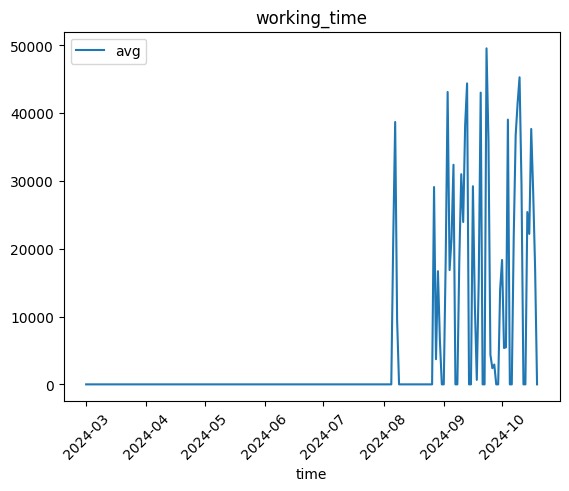

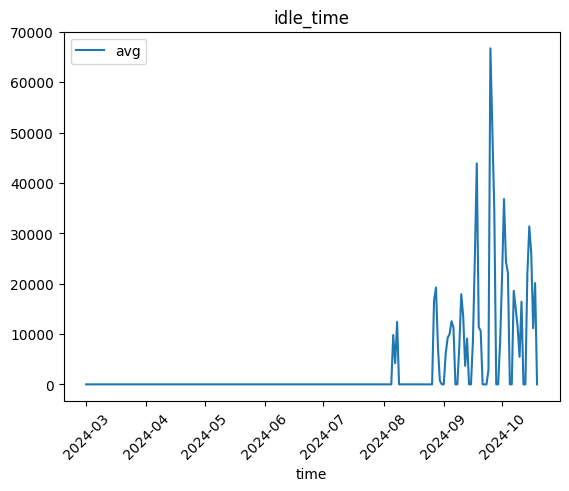

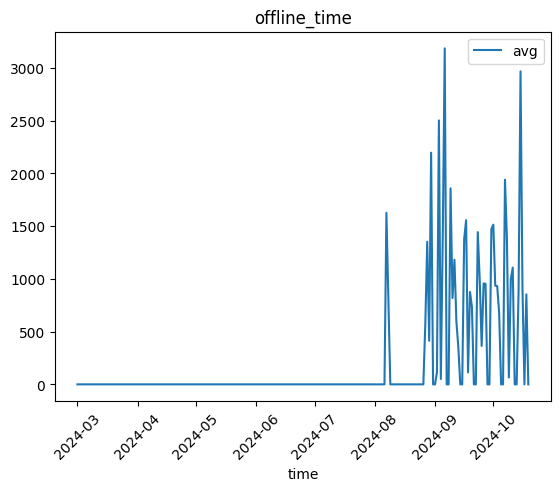

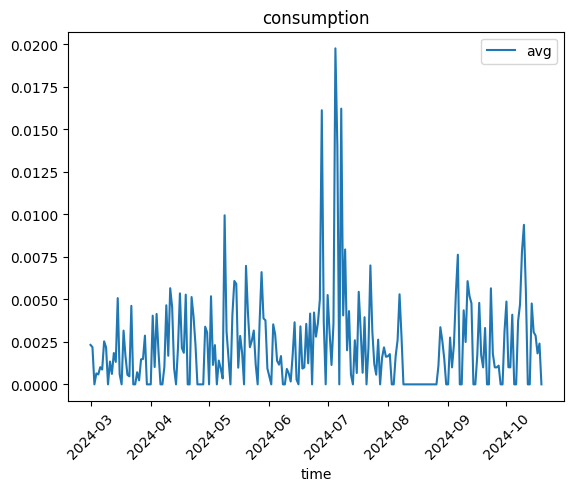

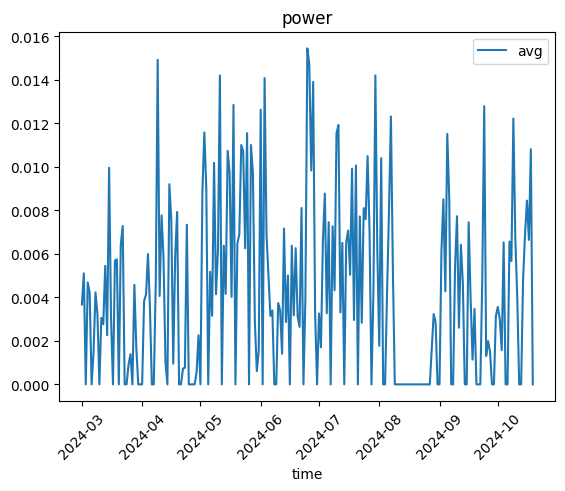

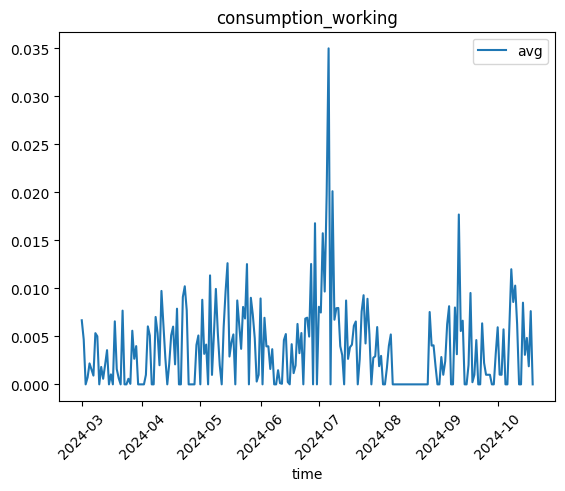

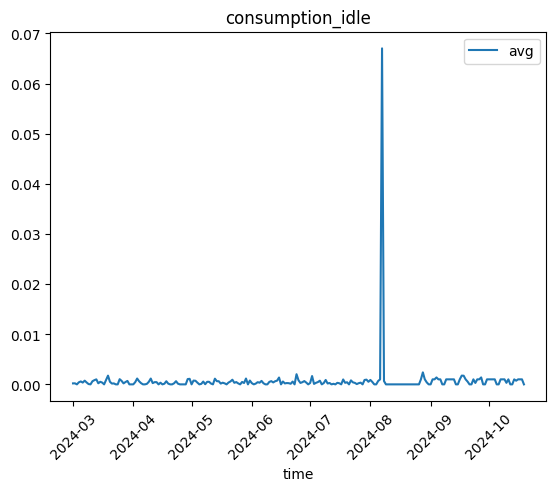

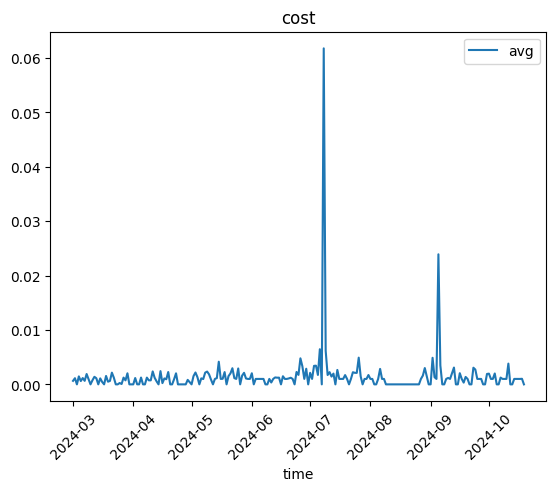

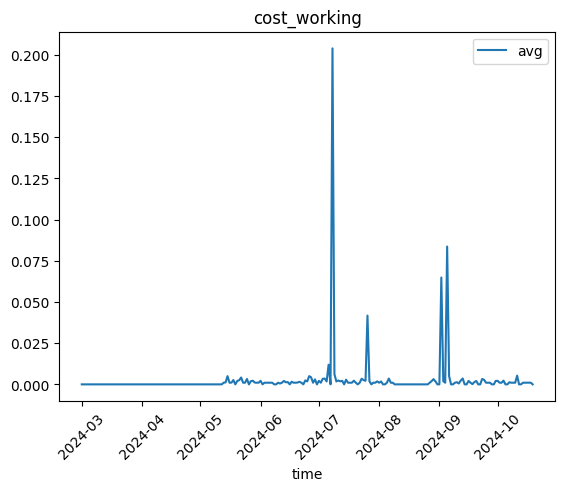

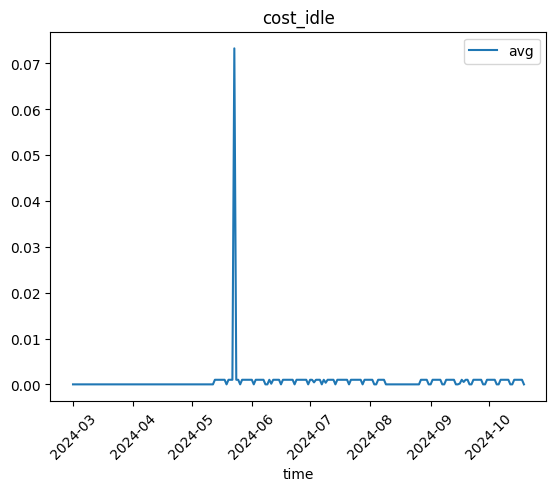

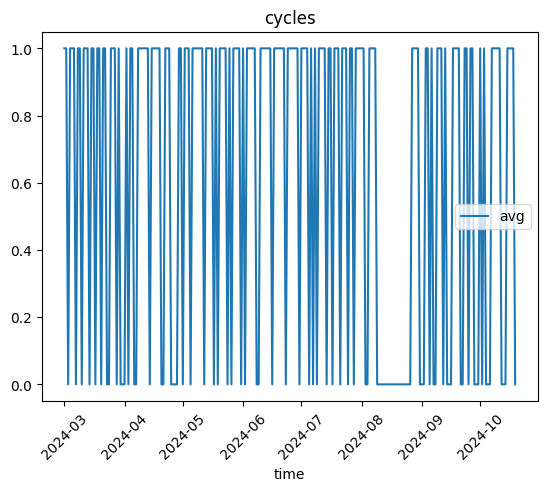

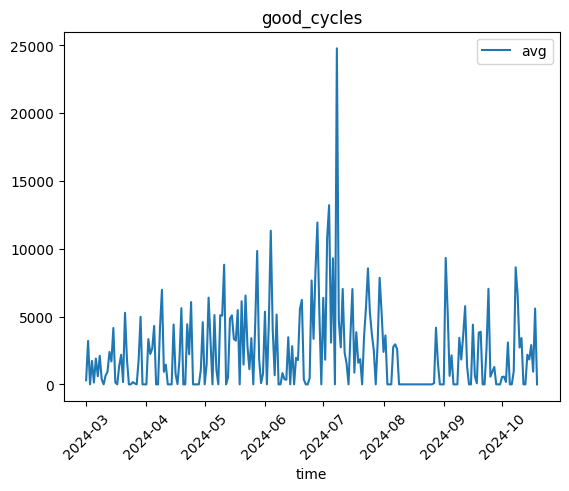

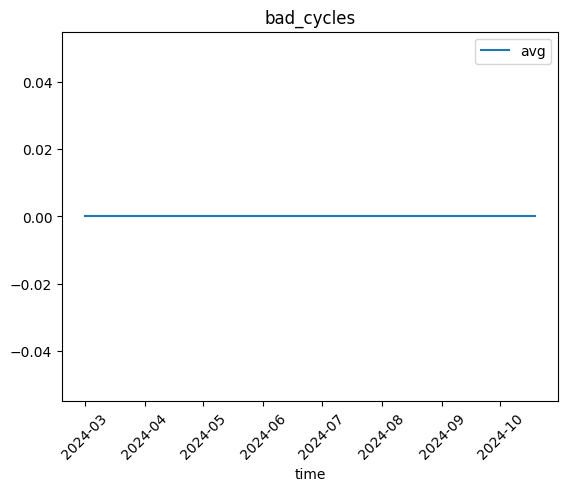

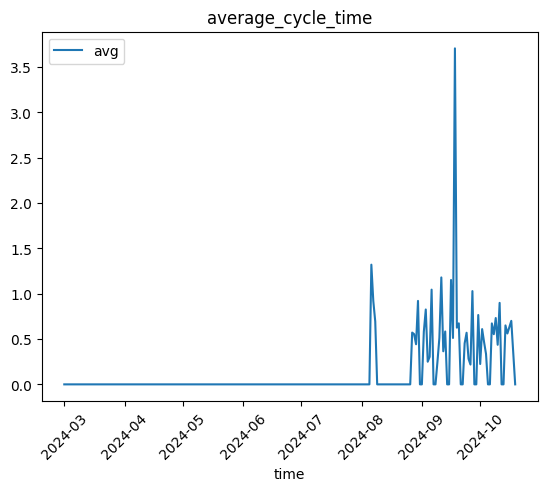

In [56]:
# for each kpi, plot the value of the kpi over time
for k in kpi:
    df_kpi = df[df['kpi'] == k]
    df_kpi.plot(x='time', y='avg', title=k)
    # make nice writings on the x axis
    plt.xticks(rotation=45)